<a href="https://colab.research.google.com/github/minhquangngo/msc_thesis/blob/main/py/collab_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INIT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/masters_thesis/msc_thesis"

/content/drive/MyDrive/masters_thesis/msc_thesis


In [3]:
!pwd

/content/drive/MyDrive/masters_thesis/msc_thesis


In [4]:
#!git clone https://github.com/minhquangngo/msc_thesis

In [5]:
!git pull

Already up to date.


In [6]:
!ls

attachments  latex  msc_thesis	py  README.md  requirements.txt


In [7]:
!pip install -r requirements.txt

In [24]:
!apt-get update -qq
!apt-get install -y -qq \
    texlive-latex-base \
    texlive-latex-extra \
    texlive-fonts-recommended \
    dvipng \
    cm-super


'Fri May 30 20:14:38 2025'

done.


In [11]:
import pandas as pd
from pathlib import Path
import mlflow
import os
import subprocess
import time


In [12]:
data_dir = Path('/content/drive/MyDrive/masters_thesis/data')
os.environ['data_dir'] = str(data_dir)

In [13]:
import mlflow, os

In [14]:
MLFLOW_DIR = Path('/content/drive/MyDrive/masters_thesis/mlflow')
MLFLOW_DIR.mkdir(exist_ok=True)
os.environ['MLFLOW_TRACKING_URI'] = f'file://{MLFLOW_DIR}'
mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])

Keeping the instance awke so that the runs does not get shut off

In [15]:
import time, threading, IPython.display as disp
def keep_awake():
    while True:
        time.sleep(60)
        disp.clear_output(wait=True); disp.display(time.ctime())
threading.Thread(target=keep_awake).start()

In [16]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/masters_thesis/msc_thesis/py')

In [17]:
%cd "/content/drive/MyDrive/masters_thesis/msc_thesis/py"

/content/drive/MyDrive/masters_thesis/msc_thesis/py


In [18]:
import models

## DATA IMPORTS

In [19]:
data_dir

PosixPath('/content/drive/MyDrive/masters_thesis/data')

In [20]:
df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

In [21]:
df_dict['10']

,vol,ret,shrout,prc,askhi,bidlo,put_volume,call_volume,put_call_ratio,vix_close,...,enhanced_baker,news_sent,mktcap,turn_sd,sect_mktcap,mvel1,dolvol,daily_illq,excess_ret,excess_mkt_ret
index,,,,,,,,,,,,,,,,,,,,,
1998-01-02,1.420280e+06,0.003287,1.013942e+06,62.745296,63.068083,61.909911,517.261250,334.857022,1.847545,23.420000,...,2.396,0.27,6.448867e+07,3.072879,6.362010e+07,17.982000,8.911586e+07,0.000037,0.003077,0.00199
1998-01-05,2.406067e+06,-0.021214,1.019566e+06,61.345891,62.921670,60.701696,530.978253,660.178316,1.212341,24.360001,...,2.396,0.25,6.375211e+07,3.072879,6.254618e+07,17.970513,1.476023e+08,0.000144,-0.021424,0.00199
1998-01-06,3.054767e+06,-0.034761,1.018568e+06,59.217327,60.627729,58.551701,1616.712030,1889.734468,1.173952,25.660000,...,2.396,0.25,6.141981e+07,3.072879,6.031685e+07,17.933243,1.808951e+08,0.000192,-0.034971,-0.01061
1998-01-07,3.424121e+06,0.024678,1.023829e+06,60.827941,61.007635,58.900709,698.726996,1089.622229,0.860878,25.070000,...,2.396,0.26,6.361143e+07,3.072879,6.227738e+07,17.968304,2.082822e+08,0.000118,0.024468,-0.00401
1998-01-08,2.111215e+06,-0.026138,1.026307e+06,59.194500,60.581523,58.992218,803.304360,1392.336539,0.953283,26.010000,...,2.396,0.22,6.219968e+07,3.072879,6.075174e+07,17.945860,1.249723e+08,0.000209,-0.026348,-0.00841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2.347036e+07,-0.010369,1.883786e+06,66.738612,68.679728,66.089400,11076.968965,11395.992407,1.101672,30.110001,...,2.409,-0.04,1.307736e+08,3.072879,1.257212e+08,18.688979,1.566379e+09,0.000007,-0.010479,-0.02181
2018-12-24,7.596090e+06,-0.040239,1.888364e+06,64.208265,66.537325,64.152997,8901.756413,12131.554525,0.944079,36.070000,...,2.409,-0.04,1.263795e+08,3.072879,1.212486e+08,18.654799,4.877318e+08,0.000083,-0.040349,-0.02561
2018-12-26,1.292724e+07,0.062713,1.874340e+06,68.235958,68.260304,63.652624,8887.402809,17054.673252,0.715864,30.410000,...,2.409,-0.08,1.324008e+08,3.072879,1.278974e+08,18.701344,8.821027e+08,0.000071,0.062603,0.05049


In [22]:
features_c4f = ['excess_mkt_ret','smb', 'hml','umd']

'Fri May 30 20:16:38 2025'

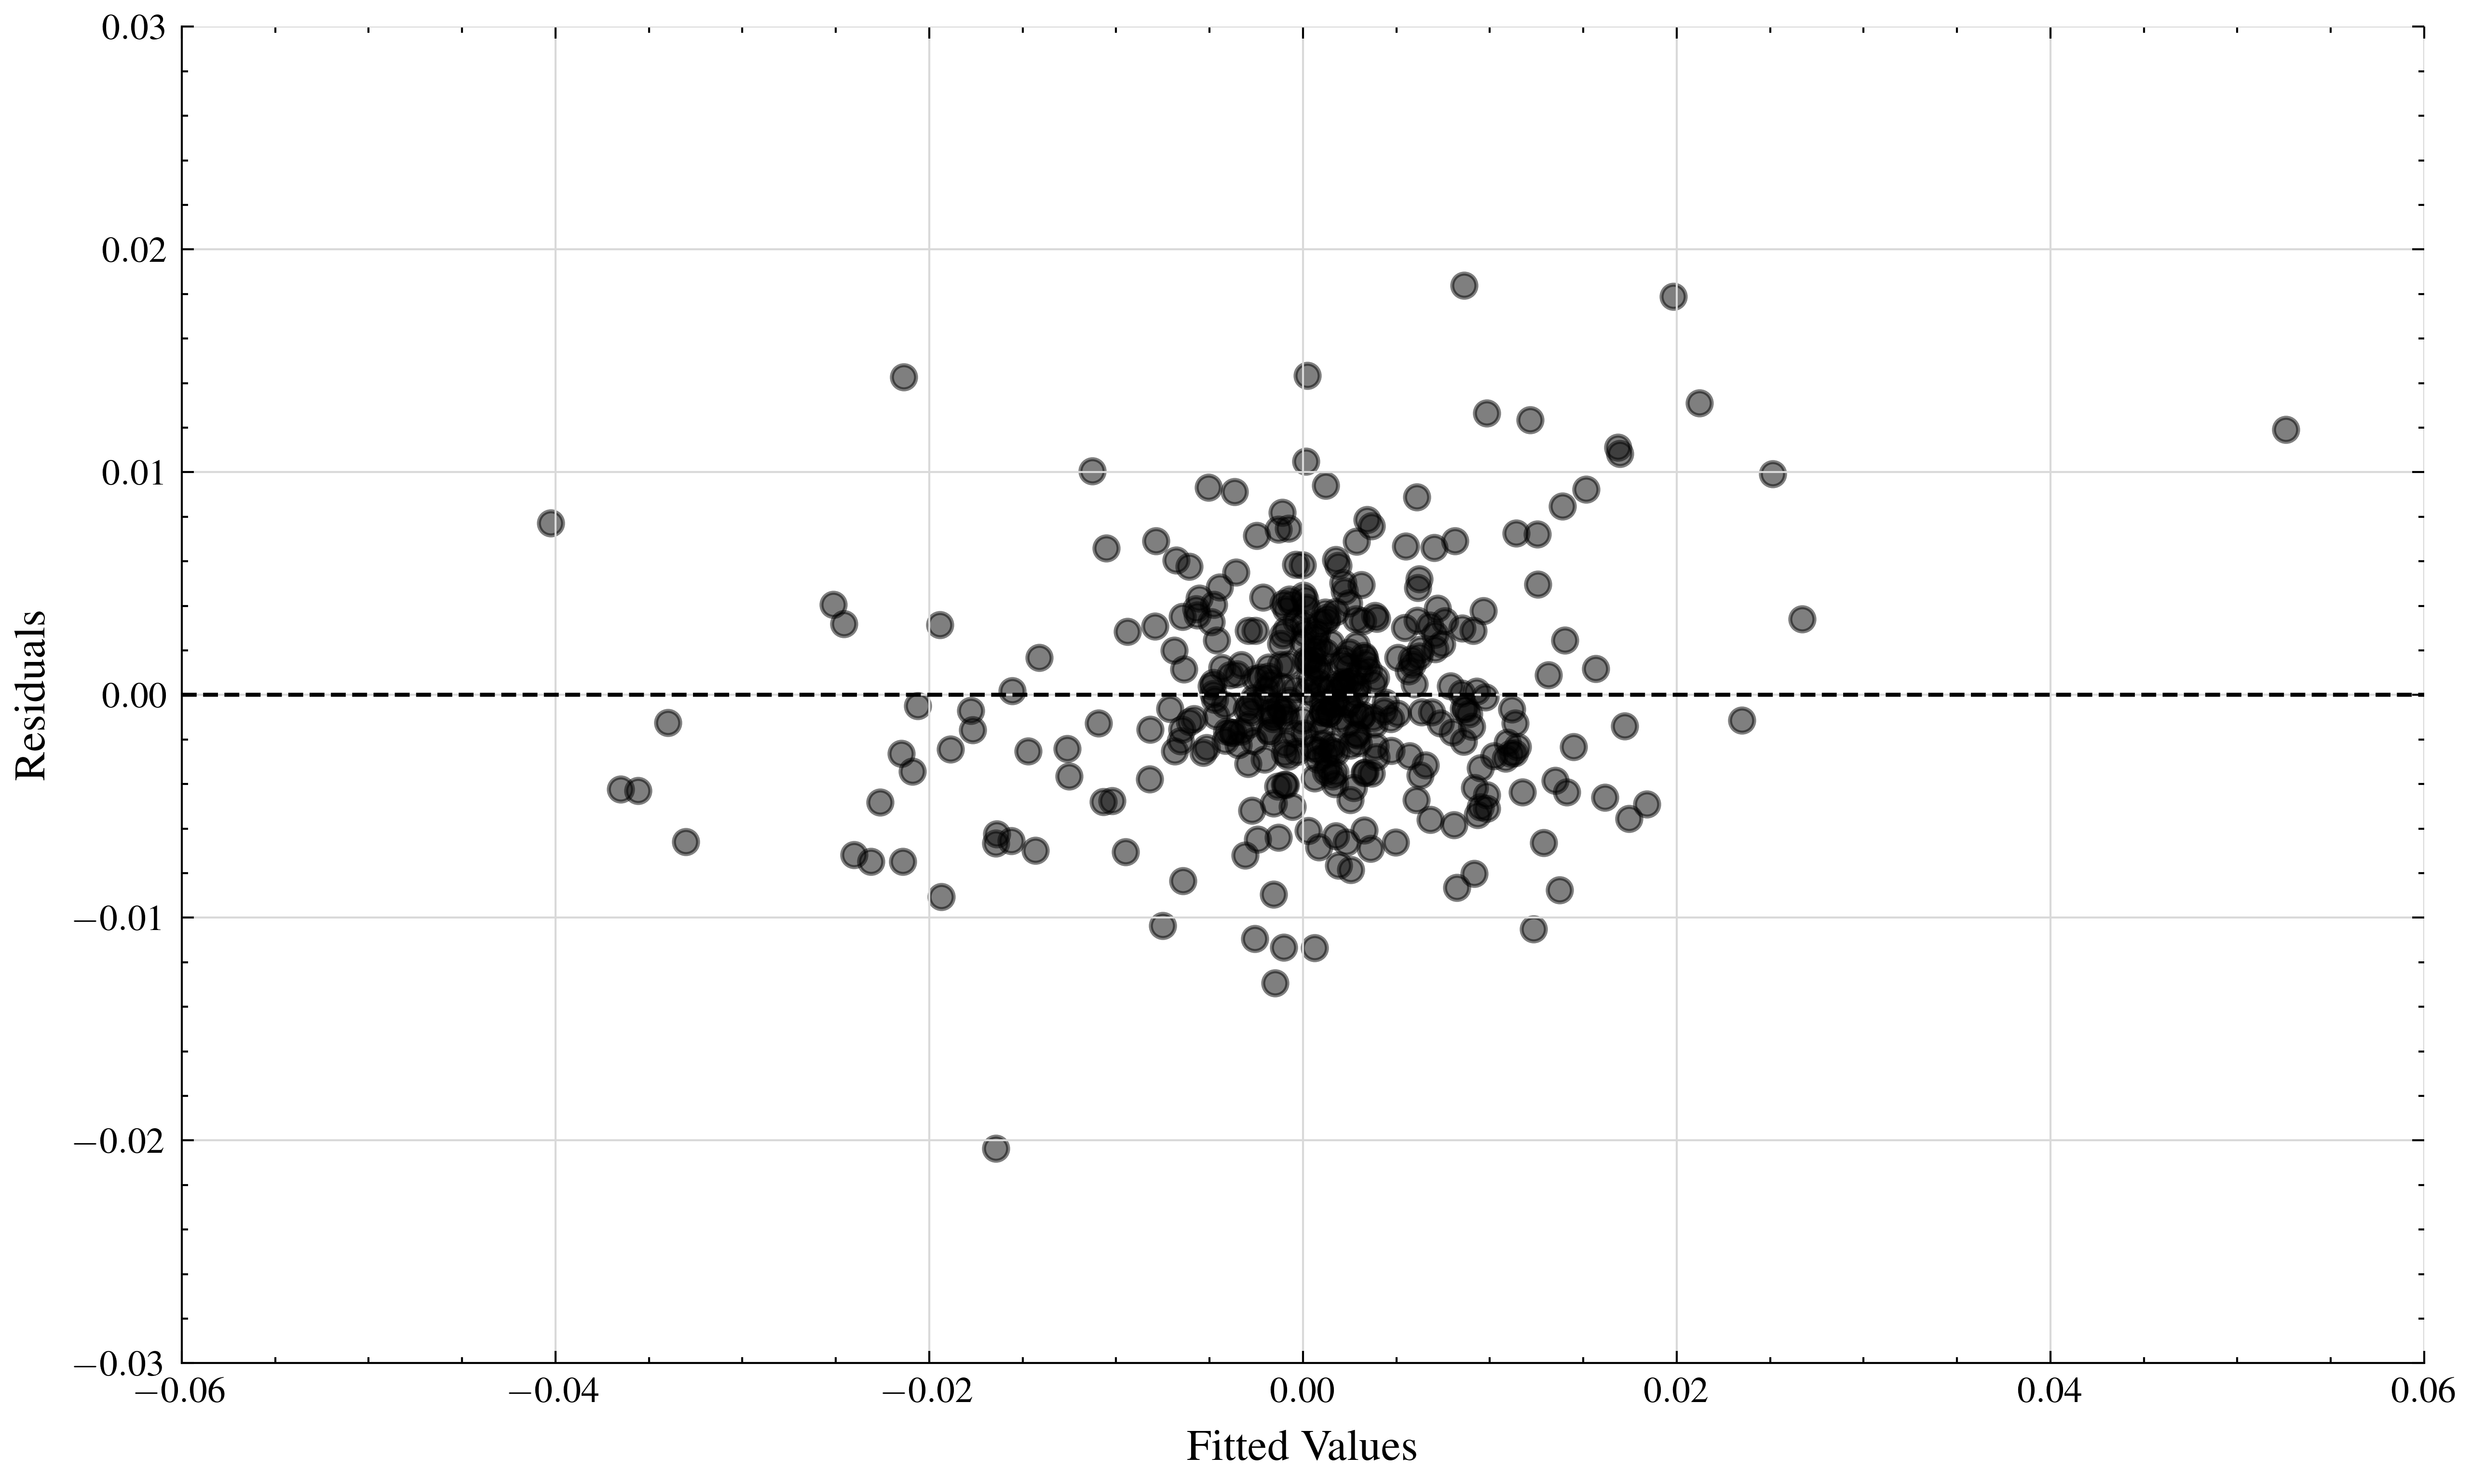

Displayed: Residuals plot for 25_baseline - hold
Experiment already exists with ID: 124837757205539114


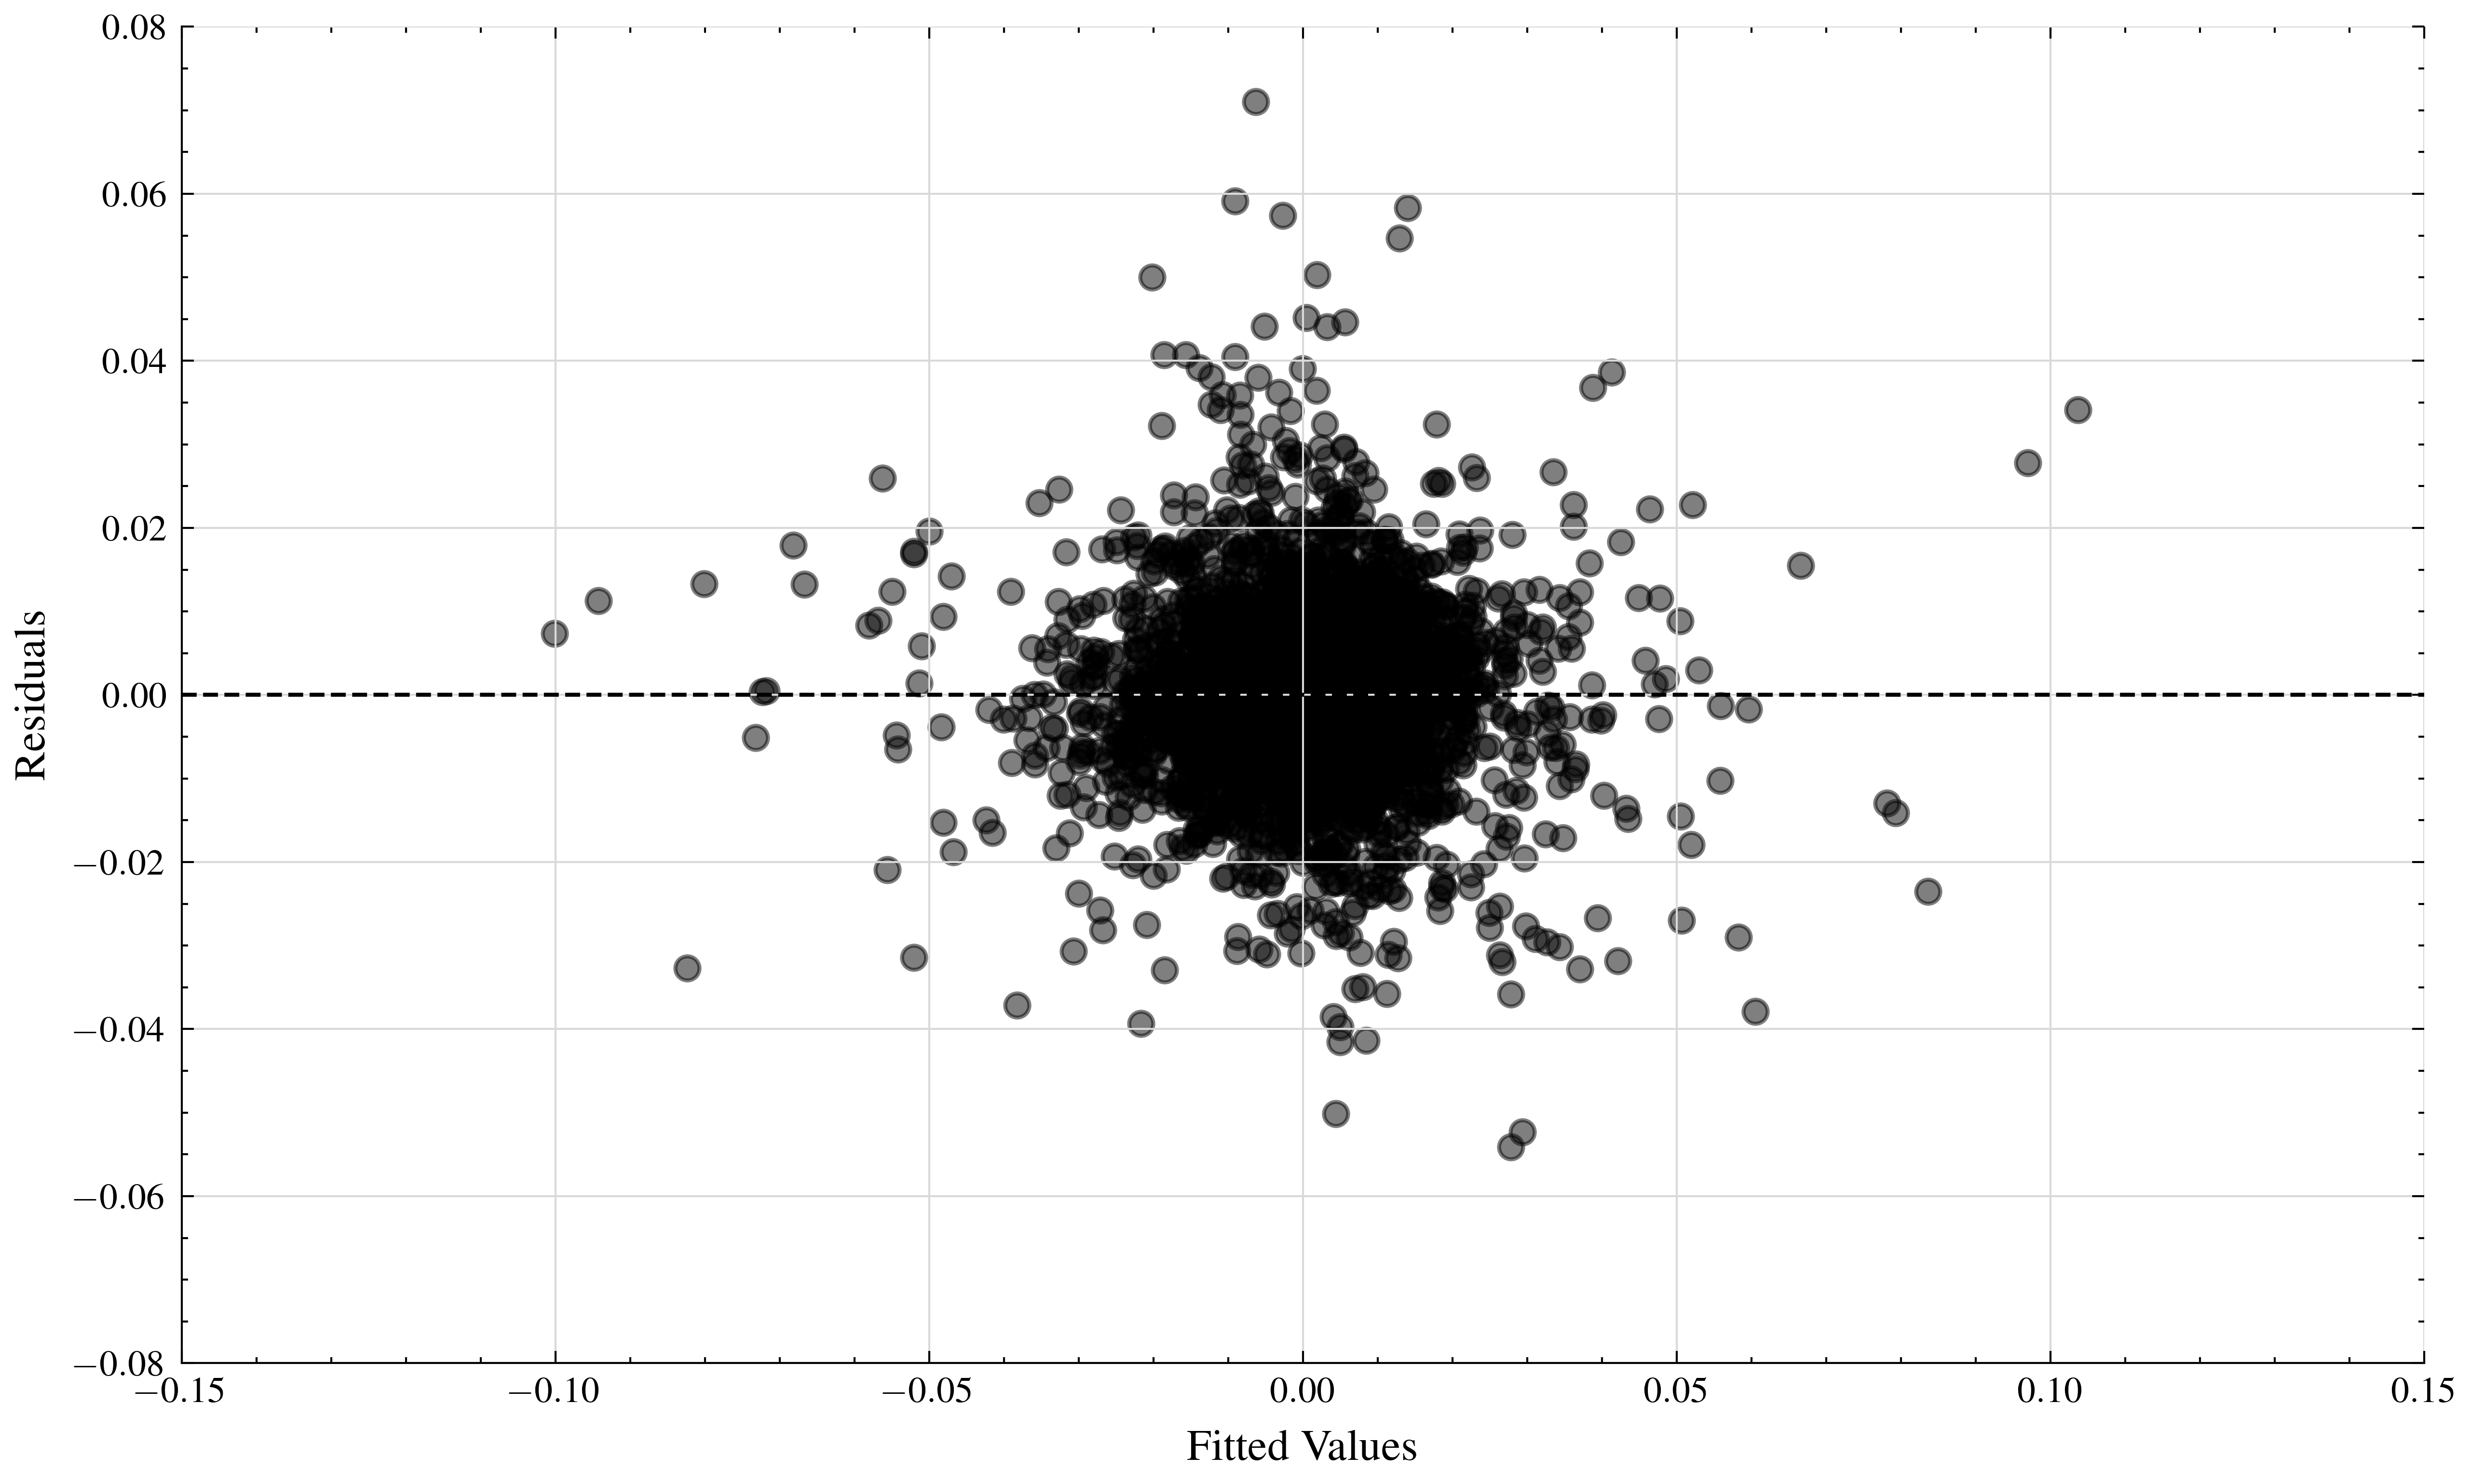

Displayed: Residuals plot for 15_baseline - sample


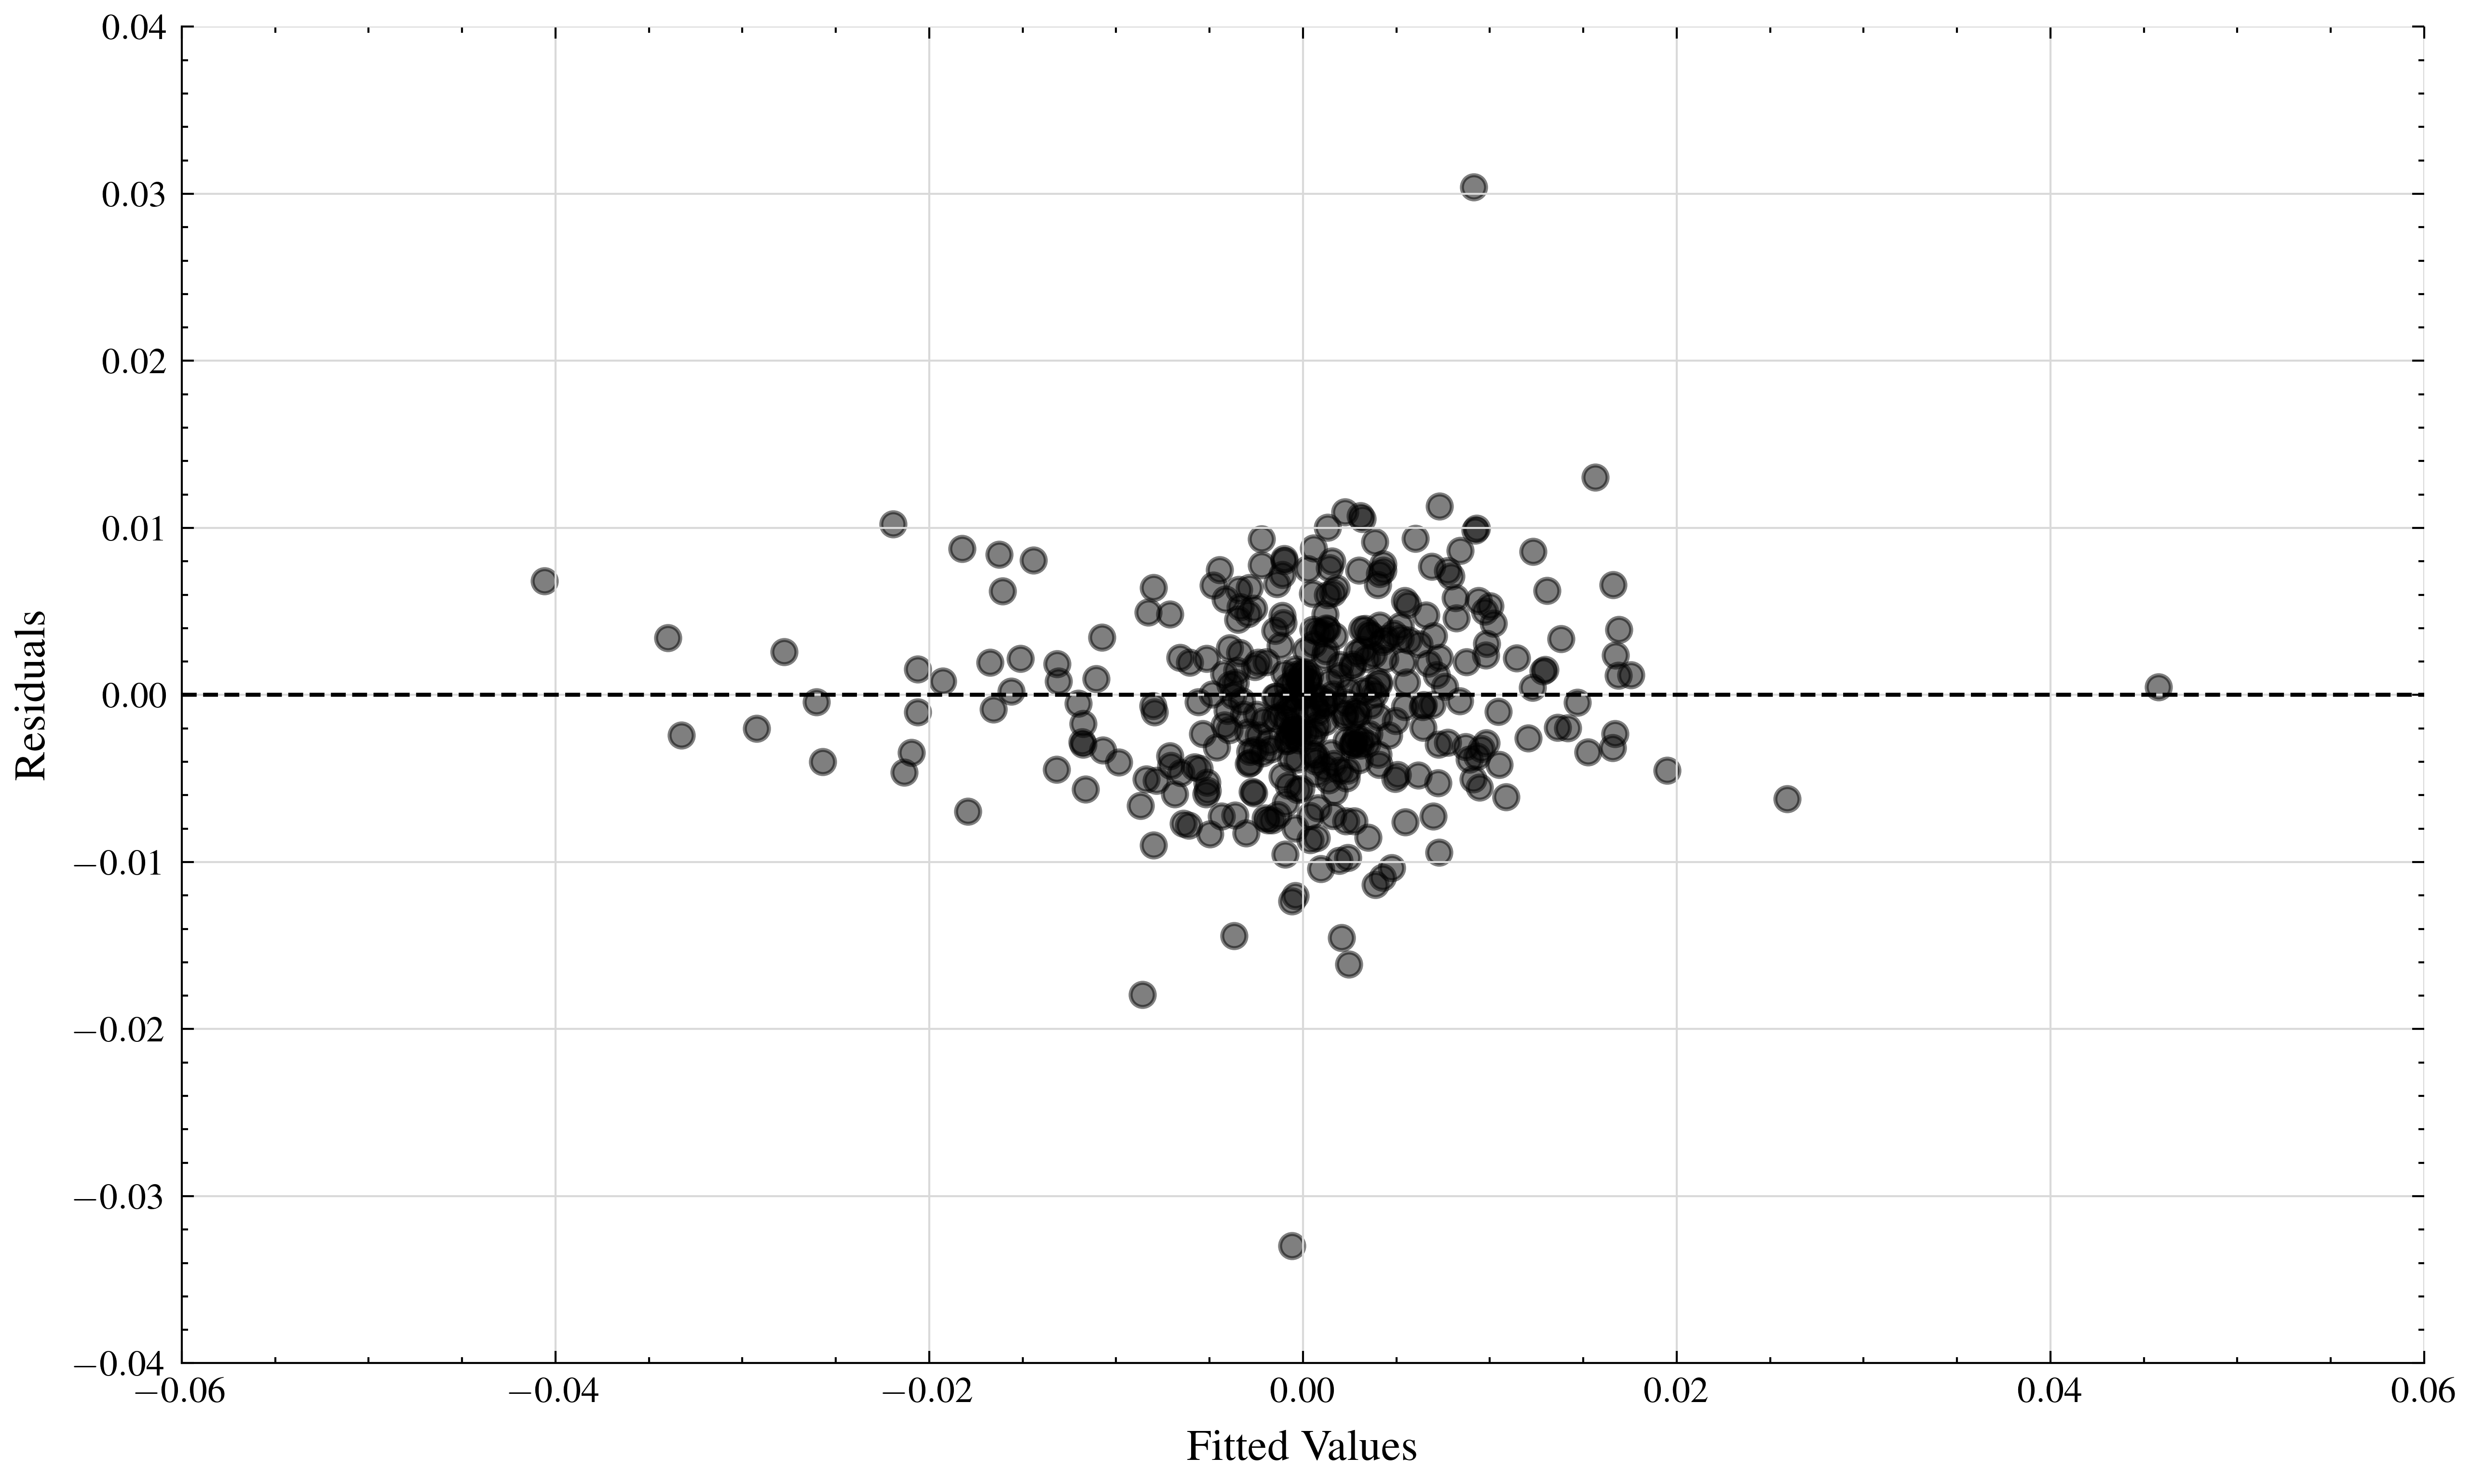

Displayed: Residuals plot for 15_baseline - hold


In [25]:
for sector, df in df_dict.items():
    model = models.olsmodel(
        y='excess_ret',
        features=features_c4f,
        lags=3,
        run_name=f'{sector}_baseline',
        fama_french_ver='c4f',
        experiment_name='baseline_ols'
    )
    model.fit(df)